# 3 - PreliminaryAnalysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import math
import numpy as np
import networkx as nx
from operator import itemgetter

In [2]:
path = "../DataSet StackOverflow/edges.csv"
path_all = "../DataSet StackOverflow/questions_2020_2021.csv"
path_nodes = "../DataSet StackOverflow/nodes.csv"

In [3]:
df = pd.read_csv(path)

In [4]:
df

,Source,Target,Count
0,reactjs,webpack,113
1,reactjs,sass,20
2,reactjs,create-react-app,100
3,reactjs,node-sass,3
4,reactjs,ios,16
...,...,...,...
97887,keyboard-input,windows-98,1
97888,get-childitem,sort-object,1
97889,ios-vision,vndocumentcameraviewcontroller,1
97890,file-read,file-search,1


In [5]:
G = nx.read_edgelist(path, comments = "S", delimiter = ",", data=(("Count", int),))

In [6]:
degree_dict = dict(G.degree(G.nodes()))
nx.set_node_attributes(G, degree_dict, 'degree')
sorted_degree = sorted(degree_dict.items(), key = itemgetter(1), reverse = True)
print(" ---- Top 20 nodes by degree ----")
for d in sorted_degree[:20]:
    print("\t" + str(d))

 ---- Top 20 nodes by degree ----
	('python', 2784)
	('javascript', 2291)
	('java', 2036)
	('android', 1676)
	('c++', 1397)
	('c#', 1389)
	('reactjs', 1142)
	('node.js', 1015)
	('python-3.x', 1010)
	('ios', 948)
	('r', 879)
	('swift', 817)
	('flutter', 816)
	('typescript', 788)
	('docker', 773)
	('angular', 762)
	('c', 762)
	('html', 745)
	('php', 693)
	('kotlin', 633)


## Select First 10kNodes (sorted by degree) from nodes.csv

In [7]:
nodes = []
others = []
for i in range(len(sorted_degree)):
    if i<10002:
        nodes.append(sorted_degree[i][0])
    else:
        others.append(sorted_degree[i][0])

In [10]:
new_df = df[(df["Source"].isin(nodes)) & (df["Target"].isin(nodes))] 

In [11]:
new_df.to_csv("../DataSet StackOverflow/edges_10K.csv",  index=False)

In [12]:
new_df = pd.DataFrame({"Id": nodes})
new_df.to_csv("../DataSet StackOverflow/nodes_10K.csv", index=False)

In [15]:
other_df = pd.DataFrame({"Id": others})
other_df.to_csv("../DataSet StackOverflow/nodes_3K.csv", index=False)

## Intersect nodes_10k with crawled dataset

In [35]:
df_questions["Tags"][0].split("|-|")[:-1]

['reactjs', 'webpack', 'sass', 'create-react-app', 'node-sass']

### Crawled DataSet

In [16]:
df_questions = pd.read_csv(path_all)

In [23]:
all_string = ""
for i in range(len(df_questions)):
    ll = df_questions["Tags"][i].split("|-|")[:-1]
    for tg in ll:
        all_string = all_string + tg + " "

In [24]:
# Total number of tags
len(all_string.split())

164520

In [25]:
count = 0
for i in range(len(df_questions)):
    ll = df_questions["Tags"][i].split("|-|")[:-1]
    count = count + len(ll)

In [26]:
#Average number of tags per question
count/len(df_questions)

3.2904

In [27]:
len(set(all_string.split()))

13848

### WordCloud tags

In [28]:
img_path = "../Images"

In [29]:
from collections import Counter
word_could_dict=Counter(all_string.split())
wordcloud = WordCloud(width = 1000, height = 500 , colormap="Blues").generate_from_frequencies(word_could_dict)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
#plt.show()
plt.savefig(img_path+'/tag_cloud.png', bbox_inches='tight')
plt.close()

In [30]:
word_could_dict.most_common(6)

[('python', 6827),
 ('javascript', 5084),
 ('android', 3203),
 ('java', 2996),
 ('reactjs', 2904),
 ('c++', 2801)]

In [31]:
for i in range(1, 4):
    print(word_could_dict.most_common()[-i])

('google-nearby-connections', 1)
('silverstripe-4', 1)
('silverstripe', 1)


### Frequency

In [32]:
from collections import Counter
word_could_dict=Counter(all_string.split())

In [33]:
word_could_dict

Counter({'reactjs': 2904,
         'webpack': 422,
         'sass': 111,
         'create-react-app': 130,
         'node-sass': 15,
         'ios': 1629,
         'xcode': 624,
         'xcode12': 140,
         'xcode12beta5': 3,
         'xcode12beta6': 2,
         'git': 412,
         'node.js': 1539,
         'npm': 372,
         'terminal': 44,
         'macos-catalina': 75,
         'node-gyp': 10,
         'firebase': 807,
         'flutter': 1902,
         'dart': 868,
         'google-cloud-firestore': 208,
         'javascript': 5084,
         'redux': 162,
         'visual-studio-code': 664,
         'yarnpkg': 75,
         'angular': 1281,
         'eslint': 157,
         'vscode-extensions': 18,
         'tslint': 8,
         'google-chrome': 316,
         'cjk': 3,
         'android': 3203,
         'android-studio': 571,
         'kotlin': 876,
         'java': 2996,
         'maven': 210,
         'jenkins': 116,
         'maven-central': 3,
         'string': 264,
    

In [34]:
less_10=0
less_100 =0
over_1000=0
tot_apperance = 0
for i, k in enumerate(word_could_dict):
    if word_could_dict[k] < 100:
        if word_could_dict[k] < 10:
            less_10 += 1
        less_100 +=1
    if word_could_dict[k] > 1000:
        over_1000+=1
    tot_apperance +=1

In [35]:
less_10/tot_apperance

0.8604852686308492

In [36]:
less_100/tot_apperance

0.985629693818602

In [37]:
over_1000/tot_apperance

0.0013720392836510688

In [38]:
over_1000

19

In [39]:
node = [i for i in range(0,len(sorted_degree))]
count = []
for i in sorted_degree:
    count.append(i[1])

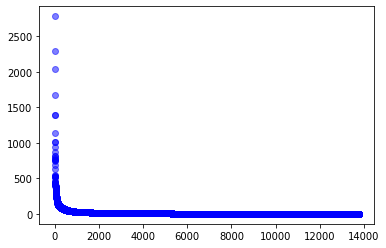

In [40]:
plt.scatter(node, count, c="b", alpha=0.5, )